In [848]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 0. Load and Clean Data

In [849]:
cannabis_full_df = pd.read_csv("https://www.dropbox.com/scl/fi/ryzkzqwbxzod2yie59ma3/cannabis_full.csv?rlkey=odvjjdivybzli8po2e0w390kq&dl=1")
cannabis_df = pd.concat([cannabis_full_df["Type"], cannabis_full_df["Rating"], cannabis_full_df.loc[:, "Creative":"Pear"]], axis=1)
cannabis_df = cannabis_df[cannabis_df["Type"] != "hybrid"]
cannabis_df["Type_is_sativa"] = np.where(cannabis_df["Type"] == "sativa", 1, 0)
cannabis_df = cannabis_df.dropna()

In [850]:
len(cannabis_df.columns), cannabis_df.columns

(67,
 Index(['Type', 'Rating', 'Creative', 'Energetic', 'Tingly', 'Euphoric',
        'Relaxed', 'Aroused', 'Happy', 'Uplifted', 'Hungry', 'Talkative',
        'Giggly', 'Focused', 'Sleepy', 'Dry', 'Mouth', 'Earthy', 'Sweet',
        'Citrus', 'Flowery', 'Violet', 'Diesel', 'Spicy/Herbal', 'Sage',
        'Woody', 'Apricot', 'Grapefruit', 'Orange', 'Pungent', 'Grape', 'Pine',
        'Skunk', 'Berry', 'Pepper', 'Menthol', 'Blue', 'Cheese', 'Chemical',
        'Mango', 'Lemon', 'Peach', 'Vanilla', 'Nutty', 'Chestnut', 'Tea',
        'Tobacco', 'Tropical', 'Strawberry', 'Blueberry', 'Mint', 'Apple',
        'Honey', 'Lavender', 'Lime', 'Coffee', 'Ammonia', 'Minty', 'Tree',
        'Fruit', 'Butter', 'Pineapple', 'Tar', 'Rose', 'Plum', 'Pear',
        'Type_is_sativa'],
       dtype='object'))

## 1. Get Regression Coefficients

Fitting three different Logistic Regression model predicting `Type`

In [851]:
import logistic_regression as lr

In [852]:
# LAMBDA = 200
# ETA = 0.0005

LAMBDA = 170
ETA = 0.0005

Effect predictors [`"Creative"` : `"Mouth"`]

In [853]:
X = cannabis_df.loc[:, "Creative":"Mouth"].values
y = cannabis_df["Type_is_sativa"].values

lr_betas_effects = lr.fit(X, y, lam=LAMBDA, eta=ETA)
lr_betas_effects = np.insert(lr_betas_effects, 0, 0)
lr_betas_effects = np.append(lr_betas_effects, np.zeros(49))

print(lr_betas_effects)

[ 0.          0.05999946  0.18025954 -0.05908041 -0.10583436 -0.23058255
 -0.0118757  -0.08244075  0.04336369 -0.09607383  0.0475651  -0.03309194
  0.07024617 -0.26367097  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


Flavor predictors [`"Earthy"` : `"Pear"`]

In [854]:
X = cannabis_df.loc[:, "Earthy":"Pear"].values
y = cannabis_df["Type_is_sativa"].values

lr_betas_flavors = lr.fit(X, y, lam=LAMBDA, eta=ETA)
lr_betas_flavors = np.append(np.zeros(16), lr_betas_flavors)

print(lr_betas_flavors)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.60069520e-01 -7.43879646e-02  6.63901977e-02 -5.05087670e-02
  6.96440162e-05 -6.08195922e-03 -1.49499385e-02 -1.60569754e-03
 -5.09643031e-02  4.33532713e-03  2.49132247e-03  1.56543524e-02
 -8.14632597e-02 -5.34360788e-02 -2.33726105e-02 -1.92547637e-02
 -9.00531567e-02 -9.35560263e-03 -2.73038376e-03 -3.39859114e-02
 -1.43455442e-02 -4.74049888e-03  6.74086777e-03  1.71979274e-02
  2.37306212e-05 -1.67938526e-03 -5.52188590e-03 -5.03746995e-03
  1.45265776e-03 -1.81510939e-03  3.39948424e-02  9.44471223e-03
 -3.31571336e-02 -5.32655541e-03 -8.63896304e-04 -6.95190840e-03
 -8.60305384e-03  3.59224562e-03 -2.60217801e-03 -4.60802696e-03
 -2.42028639e-03  9.05105520e-04  9.05105520e-04 -1.19021126e-02
  1.50760485e-02  1.18959

Only Rating predictor [`"Rating"`]

In [855]:
X = cannabis_df[["Rating"]].values
y = cannabis_df["Type_is_sativa"].values

lr_betas_rating = lr.fit(X, y, lam=LAMBDA, eta=ETA)
lr_betas_rating = np.append(lr_betas_rating, np.zeros(64))

print(lr_betas_rating)

[0.11485039 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


## 2. Weight sets

In [856]:
w1 = lr_betas_effects
w2 = lr_betas_flavors
w3 = lr_betas_rating

## 3. Perceptron

In [857]:
X_inputs = cannabis_df.loc[:, "Rating":"Pear"]
y = cannabis_df["Type_is_sativa"]

X_inputs.head()

,Rating,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
2,4.4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [858]:
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

Testing with non-hyrbid set
First 5 Predictions: [1 1 0 1 0]


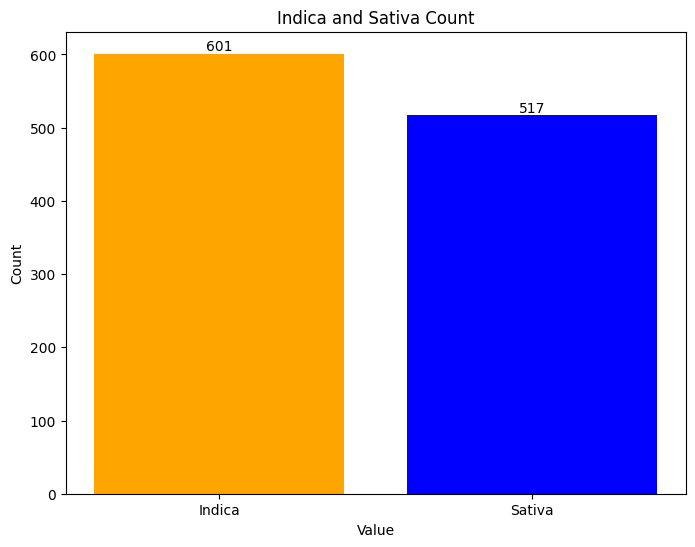

In [859]:
def calculate_activations(X, weight_sets, activation_f):
    dot_product = np.dot(X, weight_sets)
    activations = np.apply_along_axis(activation_f, 1, dot_product)
    return activations    


def perceptron(X, weight_sets, decision_boundary=0.5, activation_f=sigmoid):
    weight_sets = np.array(weight_sets).T

    l1_activations = calculate_activations(X, weight_sets, activation_f)
    l2_activation = np.mean(l1_activations, axis=1)

    return np.where(l2_activation >= decision_boundary, 1, 0)
    

# print("Testing with non-hybrid set")
preds = perceptron(X_inputs, [w1, w2, w3])

zeros = np.sum(preds == 0)
ones = np.sum(preds == 1)

print("Testing with non-hyrbid set")
print("First 5 Predictions:", preds[:5])

plt.figure(figsize=(8, 6), dpi=100)
plt.bar(['Indica', 'Sativa'], [zeros, ones], color=['orange', 'blue'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Indica and Sativa Count')
plt.text(0, zeros, str(zeros), ha='center', va='bottom')
plt.text(1, ones, str(ones), ha='center', va='bottom')
plt.show()

## 4. Prediction

In [860]:
hybrid_cannabis_df = pd.concat([cannabis_full_df["Type"], cannabis_full_df["Rating"], cannabis_full_df.loc[:, "Creative":"Pear"]], axis=1)
hybrid_cannabis_df = hybrid_cannabis_df[hybrid_cannabis_df["Type"] == "hybrid"]
hybrid_cannabis_df["Type_is_sativa"] = np.where(hybrid_cannabis_df["Type"] == "sativa", 1, 0)
hybrid_cannabis_df = hybrid_cannabis_df.dropna()

In [861]:
X_hybrid = hybrid_cannabis_df.loc[:, "Rating":"Pear"]

X_hybrid.head()

,Rating,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.7,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.6,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Testing with hybrid set
First 5 Predictions: [1 1 1 1 0]


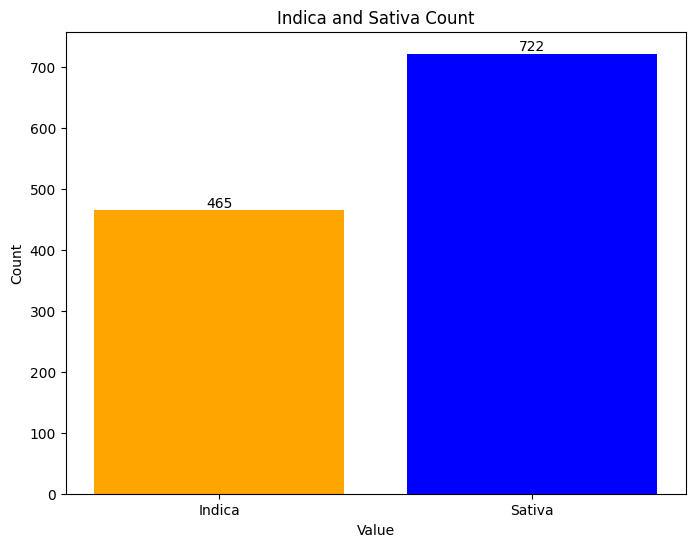

In [862]:
preds = perceptron(X_hybrid, [w1, w2, w3])

print("Testing with hybrid set")
print("First 5 Predictions:", preds[:5])

zeros = np.sum(preds == 0)
ones = np.sum(preds == 1)

plt.figure(figsize=(8, 6), dpi=100)
plt.bar(['Indica', 'Sativa'], [zeros, ones], color=['orange', 'blue'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Indica and Sativa Count')
plt.text(0, zeros, str(zeros), ha='center', va='bottom')
plt.text(1, ones, str(ones), ha='center', va='bottom')
plt.show()

'Actual Type' based on Google findings.

| Strain | Actual Type | Predicted Type |
|--------|-------------|----------------|
| 100-Og | 50/50 | Sativa |
| 98-White-Widow | Sativa | Sativa |
| 13-Dawgs | 50/50 | Sativa |
| 24K-Gold | Indica | Sativa |
| 3-Kings | Sativa | Indica |

## 5. Hidden Layer

Testing with hybrid set
First 5 Predictions: [0 1 1 1 0]


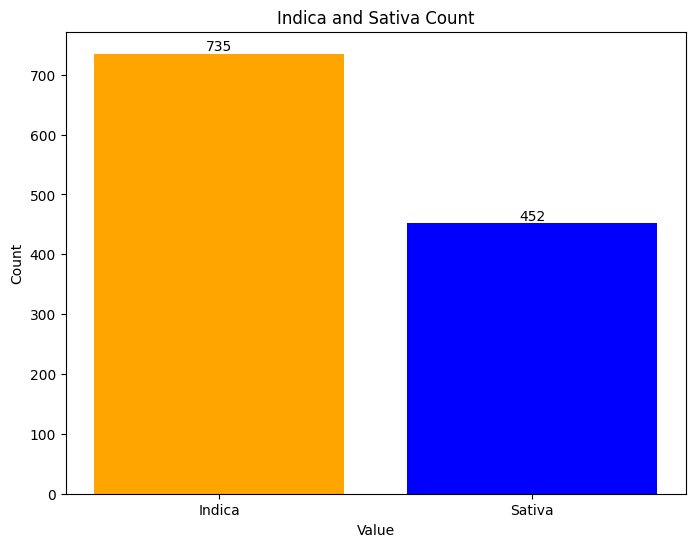

In [872]:
def calculate_activations2(X, weight_sets, activation_f):
    dot_product = np.dot(X, weight_sets)
    activations = np.apply_along_axis(activation_f, 1, dot_product)
    return activations    


def perceptron2(X, weight_sets, decision_boundary=0.5, activation_f=sigmoid):
    weight_sets = np.array(weight_sets).T

    l1_activations = calculate_activations2(X, weight_sets, activation_f)

    proportion_non_zero_params = np.count_nonzero(weight_sets, axis=0) / len(weight_sets)
    scaled_activations = l1_activations * (proportion_non_zero_params * 3.3) # cherry picked 3.3 :)

    l2_activation = np.mean(scaled_activations, axis=1)

    return np.where(l2_activation >= decision_boundary, 1, 0)


preds = perceptron2(X_hybrid, [w1, w2, w3])

print("Testing with hybrid set")
print("First 5 Predictions:", preds[:5])

zeros = np.sum(preds == 0)
ones = np.sum(preds == 1)

plt.figure(figsize=(8, 6), dpi=100)
plt.bar(['Indica', 'Sativa'], [zeros, ones], color=['orange', 'blue'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Indica and Sativa Count')
plt.text(0, zeros, str(zeros), ha='center', va='bottom')
plt.text(1, ones, str(ones), ha='center', va='bottom')
plt.show()

'Actual Type' based on Google findings.

| Strain | Actual Type | Predicted Type |
|--------|-------------|----------------|
| 100-Og | 50/50 | Indica |
| 98-White-Widow | Sativa | Sativa |
| 13-Dawgs | 50/50 | Sativa |
| 24K-Gold | Indica | Sativa |
| 3-Kings | Sativa | Indica |